<a href="https://colab.research.google.com/github/BonfaDScience/BonfaDScience/blob/main/Deteccao_de_faces_imagens_estaticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opencv-contrib-python
!pip install opencv-python

In [5]:
import numpy as np
import cv2 as cv
import os

In [8]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2025-02-19 00:46:22--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2025-02-19 00:46:23 (19.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
# !wget -P /content -O star_trek_SNW_crew2.jpg https://treknews.net/wp-content/uploads/2022/04/star-trek-strange-new-worlds-cast-photos.jpg
# !ls /content

In [9]:
!wget -P /content -O star_trek_SNW_crew.jpg  https://images.prismic.io/star-trek-untold/YmE5MGYzMjUtZmNmYi00NmQ3LTk2ODktNzYxMDhiODBjYTMw_anno_snw_s2_art-b.jpg?auto=compress%2Cformat&rect=0%2C0%2C2000%2C1080&h=1080&width=2048
!ls /content

--2025-02-19 00:46:27--  https://images.prismic.io/star-trek-untold/YmE5MGYzMjUtZmNmYi00NmQ3LTk2ODktNzYxMDhiODBjYTMw_anno_snw_s2_art-b.jpg?auto=compress%2Cformat
Resolving images.prismic.io (images.prismic.io)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.prismic.io (images.prismic.io)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248369 (243K) [image/jpeg]
Saving to: ‘star_trek_SNW_crew.jpg’

_SNW_crew.jpg       100%[===================>] 242.55K  --.-KB/s    in 0.03s   

2025-02-19 00:46:27 (9.31 MB/s) - ‘star_trek_SNW_crew.jpg’ saved [248369/248369]

haarcascade_frontalface_default.xml  sample_data  star_trek_SNW_crew.jpg


Found haarcascade file at /content/haarcascade_frontalface_default.xml


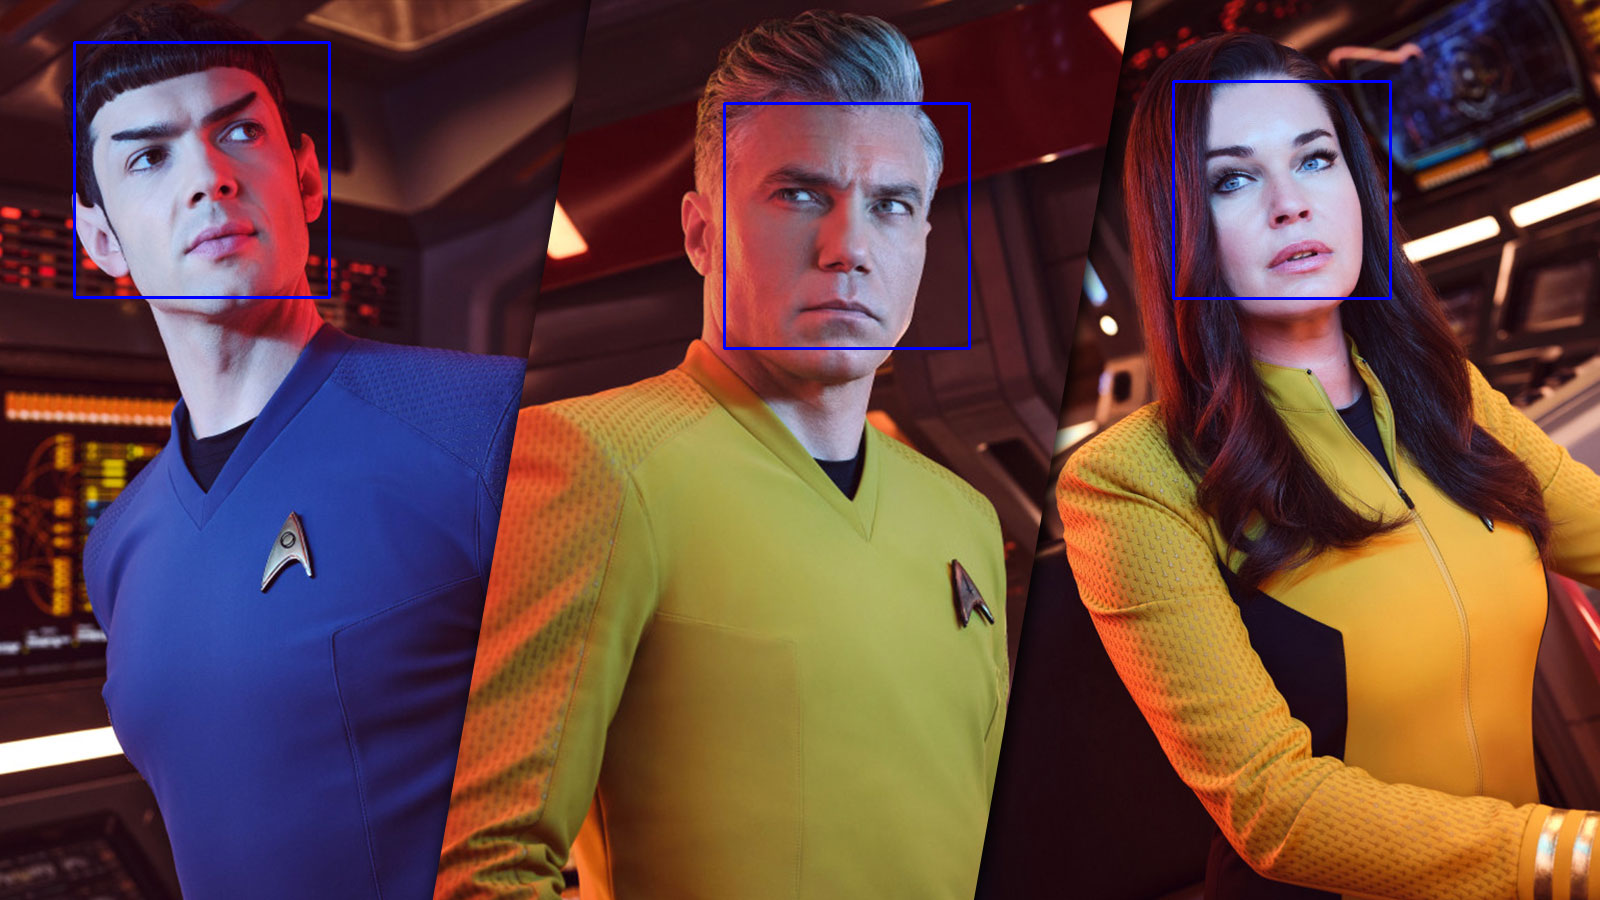

In [12]:
opencv_data_dir = '/content' # Change this to the actual path if needed.
face_cascade_path = os.path.join(opencv_data_dir, 'haarcascade_frontalface_default.xml')

# Check if the file exists
if not os.path.exists(face_cascade_path):
    print(f"Error: Haarcascade file not found at {face_cascade_path}")
else:
    print(f"Found haarcascade file at {face_cascade_path}")

face_cascade = cv.CascadeClassifier(face_cascade_path)
image = cv.imread('/content/star_trek_SNW_crew.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(image)